In [1]:
#BÀI THỰC HÀNH PHẦN HARD MARGIN SUPPORT VECTOR MACHINE

In [2]:
#vidu1

In [3]:
#a) xây dựng các bước

In [4]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 100
X0 = np.random.multivariate_normal(means[0], cov, N)  # class 1
X1 = np.random.multivariate_normal(means[1], cov, N)  # class -1
X = np.concatenate((X0.T, X1.T), axis=1)  # all data
y = np.concatenate((np.ones((1, N)), -1 * np.ones((1, N))), axis=1)  # labels 

In [5]:
#truc quan du lieu

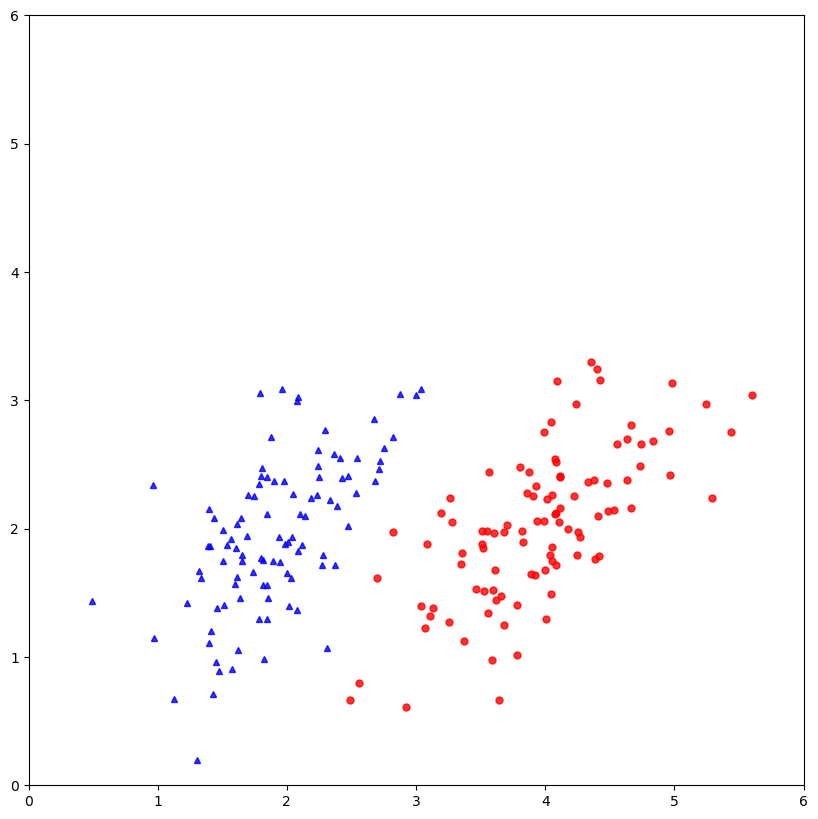

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
ani = plt.cla()
#plot points
ani = plt.plot(X0.T[0, :], X0.T[1, :], 'b^', markersize=5, alpha=.8)
ani = plt.plot(X1.T[0, :], X1.T[1, :], 'ro', markersize=5, alpha=.8)
ani = plt.axis([0, 6, 0, 6])
plt.show()


In [7]:
from cvxopt import matrix, solvers

# build K
V = np.concatenate((X0.T, -X1.T), axis=1)
K = matrix(V.T.dot(V))  # see definition of V, K near eq (??)

p = matrix(-np.ones((2 * N, 1)))  # all-one vector

# build A, b, G, h
G = matrix(-np.eye(2 * N))  # for all lambda_n >= 0! note that we solve -g(lambda) -> min
h = matrix(np.zeros((2 * N, 1)))
A = matrix(y)  # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1)))
solvers.options['show_progress'] = False
sol = solvers.qp(K, p, G, h, A, b)

l = np.array(sol['x'])  # lambda
print('lambda = ')
print(l.T)


lambda = 
[[5.92924398e-10 1.94139394e-09 3.84240658e-10 2.34590064e-09
  1.99860594e-09 1.65747762e-09 1.68596002e-09 1.05828021e-09
  1.67680410e-09 2.61227214e-09 2.59068293e-09 1.20191053e-09
  1.75995285e-09 1.66696815e-09 5.06420275e-10 3.00471043e-09
  1.46994496e-09 6.59850201e-10 1.70269435e-09 1.27207328e-09
  2.02130759e-09 1.19097145e-09 8.73613571e-10 2.07801810e-10
  3.15457750e-10 1.73784338e-09 1.18126342e-09 1.81094794e-09
  9.80210835e-10 2.84478869e-10 1.33542342e-09 1.24303751e-09
  1.80395436e-08 1.43745324e-09 1.62392389e-09 1.83974875e-09
  2.53966002e-10 1.70564370e-09 1.92398711e-09 3.08485833e-10
  1.60412081e-09 1.73669606e-09 2.64262343e-10 1.73952420e-09
  2.42376933e-09 3.57114903e+01 1.27412787e-09 1.42277650e-09
  1.48918195e-09 2.16249949e-09 2.08678373e-09 1.77004934e-09
  1.34113039e-09 1.85409124e-09 2.14778316e-09 1.53106273e-09
  1.64051465e-09 4.32408561e-10 1.53457308e-09 8.23766279e-10
  1.83555412e-09 1.79358082e-09 3.13552818e-09 3.45283742e-1

In [8]:
epsilon = 1e-6  # just a small number, greater than 1e-9, to filter values of lambda
S = np.where(l > epsilon)[0]
VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]
# calculate w and b
w = VS.dot(lS)
b = np.mean(yS.T - w.T.dot(XS))
print('w = ', w.T)
print('b = ', b)


w =  [[-10.98164994   3.98551086]]
b =  22.07538419522855


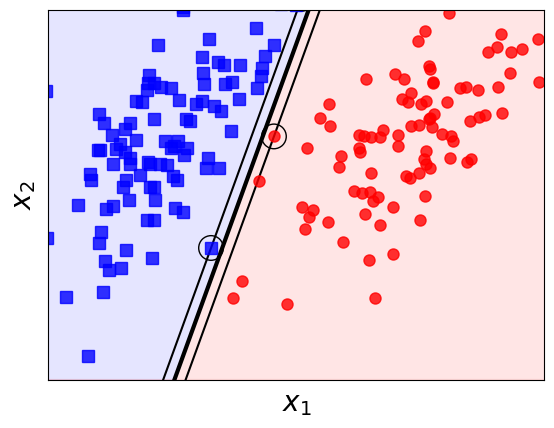

In [9]:
from matplotlib.backends.backend_pdf import PdfPages  
with PdfPages('C:\\Users\\TGDD\\Desktop\\học máy\\svm4hardmargin.pdf') as pdf:   # draw 
 # plot points 
    fig, ax = plt.subplots()
    x1 = np.arange(-10, 10, 0.1)
    y1 = -w[0, 0] / w[1, 0] * x1 - b / w[1, 0]
    y2 = -w[0, 0] / w[1, 0] * x1 - (b - 1) / w[1, 0]
    y3 = -w[0, 0] / w[1, 0] * x1 - (b + 1) / w[1, 0]
    plt.plot(x1, y1, 'k', linewidth=3)
    plt.plot(x1, y2, 'k')

    plt.plot(x1, y3, 'k')
    y4 = 10 * x1
    plt.plot(x1, y1, 'k')
    plt.fill_between(x1, y1, color='red', alpha=0.1)
    plt.fill_between(x1, y1, y4, color='blue', alpha=.1)
    plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize=8, alpha=.8)
    plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize=8, alpha=.8)
    plt.axis('equal')
    plt.ylim(0, 3)
    plt.xlim(2, 4)

    # hide tikcs
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])

    # add circles around support vectors
    for m in S:
        circle = plt.Circle((X[0, m], X[1, m]), 0.1, color='k', fill=False)
        ax.add_artist(circle)
    plt.xlabel('$x_1$', fontsize=20)
    plt.ylabel('$x_2$', fontsize=20)

    # plt.savefig('svm4.png', bbox_inches='tight', dpi = 300)
    pdf.savefig()
    plt.show()

In [10]:
#b) Sử dụng thư viện 

In [11]:
from sklearn.svm import SVC

# Copy and put code for generate data here
y1 = y.reshape((2 * N,))
X1 = X.T  # each sample is one row
clf = SVC(kernel='linear', C=1e5)  # just a big number

# if C is small, method will be “SoftMagin SVM”,
# if C is large enough, method is near to hard margin
clf.fit(X1, y1)

w_ = clf.coef_
w0 = clf.intercept_
print('w = ', w_)
print('b = ', w0)


w =  [[-10.9757742    3.98337984]]
b =  [22.06375222]


In [12]:
#BAI TAP THUC HANH 

In [13]:
#1

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = np.sign(b + np.dot(w.T, X))

print("Accuracy : " , accuracy_score(y,y_pred))
print("Confusion matrix : \n", confusion_matrix(y.ravel(), y_pred.ravel()))

Accuracy :  1.0
Confusion matrix : 
 [[100   0]
 [  0 100]]


In [15]:
#2

In [16]:
from sklearn import datasets
from sklearn.svm import SVC

cancer_data = datasets.load_breast_cancer()

# show to test record 5th
print(cancer_data.data[5])
print(cancer_data.data.shape)

#target set
print(cancer_data.target)
from sklearn.model_selection import train_test_split

cancer_data = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.3,
                                                    random_state=109)

# create a svm classifier
clf1 = SVC(kernel='linear', C=1e5)  # just a big number

clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

[1.245e+01 1.570e+01 8.257e+01 4.771e+02 1.278e-01 1.700e-01 1.578e-01
 8.089e-02 2.087e-01 7.613e-02 3.345e-01 8.902e-01 2.217e+00 2.719e+01
 7.510e-03 3.345e-02 3.672e-02 1.137e-02 2.165e-02 5.082e-03 1.547e+01
 2.375e+01 1.034e+02 7.416e+02 1.791e-01 5.249e-01 5.355e-01 1.741e-01
 3.985e-01 1.244e-01]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 

In [17]:
#VIDU2

In [20]:
import pandas as pd

# load data
df = pd.read_csv('C:\\Users\\TGDD\\Desktop\\học máy\\Support Vector Machine - Hard Margin\\sonar.all-data.csv', header=None)

y_df = df.iloc[:, 60]
targes_label = {'M': 1, 'R': -1}
targes_df = [targes_label[item] for item in y_df]


inputs_df = df.iloc[:,0:60]

x0 = np.ones((inputs_df.shape[0], 1))
X = np.concatenate((x0, inputs_df), axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, targes_df, test_size=0.3, random_state=42)

from sklearn.svm import SVC

clf2 = SVC(kernel='linear', C=1e5)
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print(y_pred)
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

[ 1 -1  1 -1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1
 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1
 -1 -1 -1  1 -1 -1  1  1  1 -1 -1  1  1  1 -1]
Accuracy :  0.746031746031746
Confusion Matrix : 
 [[20  8]
 [ 8 27]]
